In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive
from sklearn import tree
import graphviz


In [2]:
df = pd.read_pickle("./TempData/preprocessed")
df.head()

,Unnamed: 0,text,label,tweet_length,tidy_tweet,tidy_tweet_tokens,tokens_no_stop
0,0,These girls are the equivalent of the irritati...,racism,99,these girls equivalent irritating asian girls ...,"[these, girl, equivalent, irritate, asian, gir...","[girl, equivalent, irritate, asian, girl, coup..."
1,2,"Colin will save them. They're pretty blondes, ...",sexism,75,colin will save them they pretty blondes they ...,"[will, save, pretty, blonde, keep, tell]","[save, pretty, blonde, keep, tell]"
2,9,Stop saying dumb blondes with pretty faces as ...,sexism,94,stop saying dumb blondes with pretty faces nee...,"[stop, say, dumb, blonde, with, pretty, face, ...","[stop, say, dumb, blonde, pretty, face, need, ..."
3,10,Obviously natural blondes!! #mkr,sexism,32,obviously natural blondes,"[obviously, natural, blonde]","[obviously, natural, blonde]"
4,11,R u fucking kidding - catwalk - all that's mis...,sexism,65,fucking kidding catwalk that missing pole,"[fuck, kid, catwalk, that, miss, pole]","[fuck, kid, catwalk, miss, pole]"


In [3]:
flat_list = [item for sublist in df['tokens_no_stop'].values for item in sublist]
print("Total words:",len(flat_list))
vocab = list(set(flat_list))
print("Unique words:", len(vocab))

Total words: 45449
Unique words: 7058


## Data preparation

In [4]:
X = np.zeros((len(df['text']),len(vocab)))
y = np.zeros((len(df['text'])))

for idx, row in df.iterrows():
    for word in row['tokens_no_stop']:
        X[idx][vocab.index(word)] = 1
    if row['label'] not in ['none','normal','NOT']:
        y[idx] = 1
X    

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Decision tree

In [5]:
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=10)
clf = clf.fit(X, y)

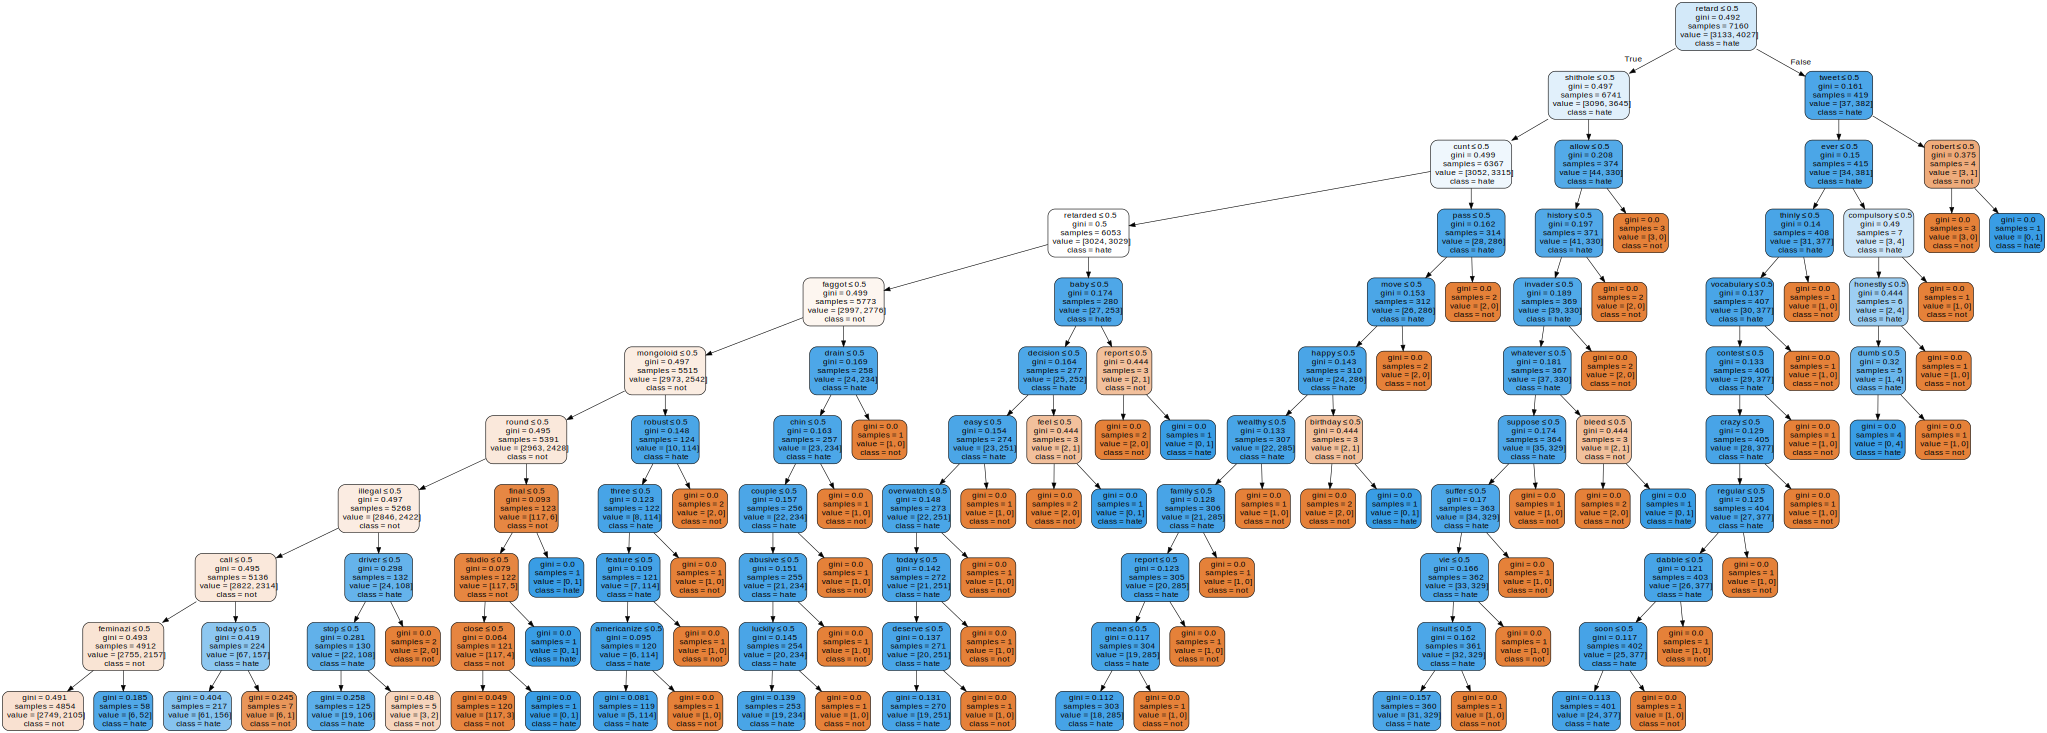

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None,
    class_names=['not','hate'],
    feature_names=vocab,
    filled=True, rounded=True,  special_characters=True) 

graph = graphviz.Source(dot_data) 
graph.render("./twitter_data/tree") 

display(graphviz.Source(dot_data))  

## Save bag of words

In [7]:
a = pd.DataFrame(X, columns=vocab)
a.to_csv("./twitter_data/word_vector.csv")

## feature importance
_feature_importances_ attribute on the model can be used to get most important features. It gives the value for each feature, more the value more the importance. The top 20 important features are shown below.

In [8]:
importances = list(clf.feature_importances_)
feature_importances = [(feature, round(importance, 10)) for feature, importance in zip(vocab, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# print(feature_importances)
top_i = 0
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))
    if top_i == 20:
        break
    top_i += 1

Variable: retard               Importance: 0.1385708317
Variable: cunt                 Importance: 0.1283431052
Variable: faggot               Importance: 0.1251685553
Variable: retarded             Importance: 0.1217977319
Variable: shithole             Importance: 0.1179610746
Variable: mongoloid            Importance: 0.0680463294
Variable: round                Importance: 0.0518174701
Variable: illegal              Importance: 0.0443967703
Variable: call                 Importance: 0.0374681666
Variable: feminazi             Importance: 0.0313460841
Variable: today                Importance: 0.0079249981
Variable: allow                Importance: 0.0060098582
Variable: tweet                Importance: 0.0045133767
Variable: robust               Importance: 0.0043854967
Variable: move                 Importance: 0.0043172419
Variable: pass                 Importance: 0.0042622451
Variable: invader              Importance: 0.0041051218
Variable: history              Importance: 0.004